### Group 19:
Jianting Liu(8950907)


### Strawberry disease detection(image classification)

**import libraries**

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pathlib

## 1. Obtain the Data: Get strawberry dataset 
**Download dataset from Kaggle:https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset**

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array, save_img
import os

datagen = ImageDataGenerator(
   rotation_range=40,
   width_shift_range=0.2,
   height_shift_range=0.2,
   horizontal_flip=True,
   fill_mode='nearest'
)

def augment_images(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    total_processed = 0
    
    image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    print(f"Found {len(image_files)} images to process")
    
    for img_file in image_files:
        try:
            img_path = os.path.join(input_dir, img_file)
            img = load_img(img_path)
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)
            
            for batch in datagen.flow(x, 
                                batch_size=1,
                                save_to_dir=output_dir, 
                                save_prefix=f'aug_{img_file[:-4]}', 
                                save_format='JPG'):
                total_processed += 1
                print(f"Generated image {total_processed} from {img_file}")
                break
                
        except Exception as e:
            print(f"Error processing {img_file}: {e}")
            
    print(f"Finished: Generated {total_processed} new images")

input_dir = "./data/strawberry/Strawberry___healthy"
output_dir = "./data/strawberry/aug"
augment_images(input_dir, output_dir)

Found 456 images to process
Generated image 1 from 8f558908-aa1b-4a86-855a-5094c2392e5a___RS_HL 1973.JPG
Generated image 2 from b8e9ed27-8e37-4214-9206-f8c0ef21cf4d___RS_HL 4847.JPG
Generated image 3 from abdd34a0-ab02-41e0-95a3-a014ab863ec2___RS_HL 1757.JPG
Generated image 4 from d1aee44a-b6bb-45b9-b7b6-5d553add8fd1___RS_HL 2163.JPG
Generated image 5 from 3d28c3ea-8419-4e09-addd-211e3828e39f___RS_HL 1942.JPG
Generated image 6 from 4005fb13-0d7c-4a30-9ee3-73e9e4cee05e___RS_HL 1688.JPG
Generated image 7 from 29050f21-a393-473e-9f9c-7fd99feef9a7___RS_HL 4533.JPG
Generated image 8 from a5db3b2a-9806-45c1-b1f8-9d6f414222f2___RS_HL 2067.JPG
Generated image 9 from c4eca43a-adf9-4d30-a990-8b177165fb04___RS_HL 4708.JPG
Generated image 10 from 33d585b6-736d-4767-9004-2444f4916fd9___RS_HL 4360.JPG
Generated image 11 from aa47a5b4-789e-43ff-acd0-70bef9f8a365___RS_HL 4564.JPG
Generated image 12 from d454c3f8-ca2e-4935-9c09-3b6a480ac097___RS_HL 1870.JPG
Generated image 13 from 03fe6806-ca61-46c1-88

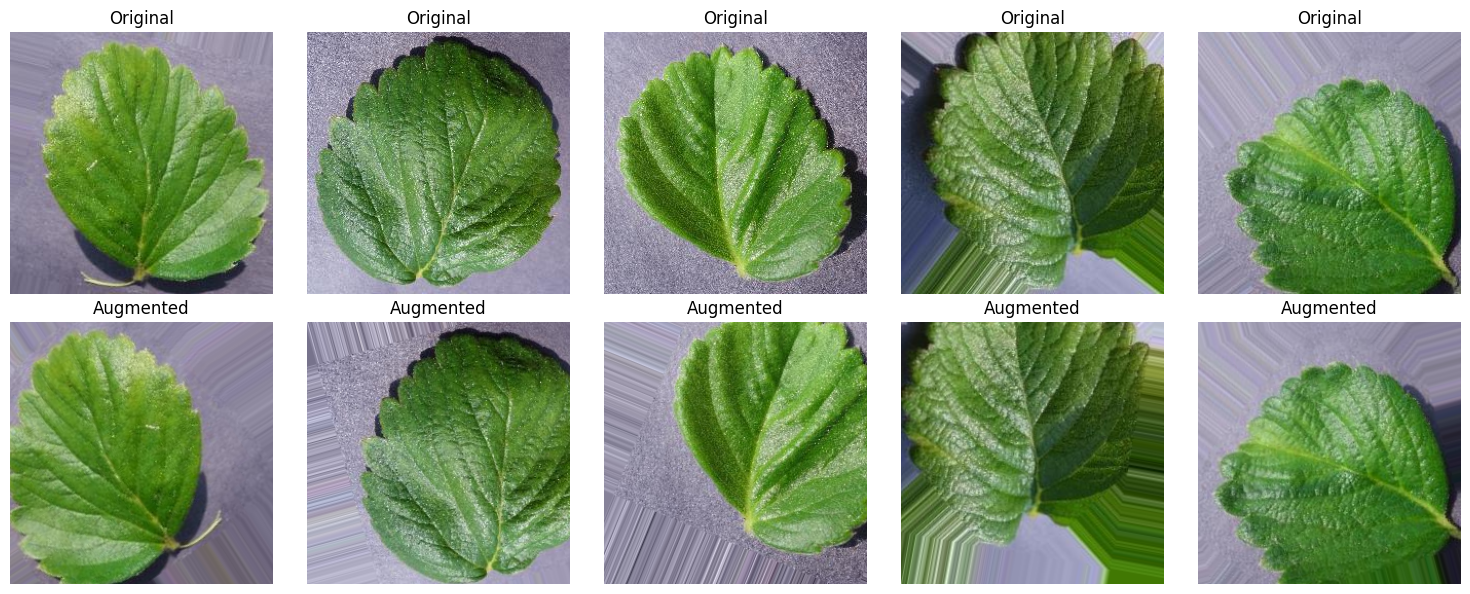

In [21]:
import matplotlib.pyplot as plt
import random
from tensorflow.keras.utils import load_img, img_to_array
import os
import numpy as np

# 
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# get 5 images
input_dir = "./data/strawberry/Strawberry___healthy"
original_images = [f for f in os.listdir(input_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
selected_images = random.sample(original_images, 5)

plt.figure(figsize=(15, 6))
for idx, img_name in enumerate(selected_images):
    # original
    img_path = os.path.join(input_dir, img_name)
    orig_img = load_img(img_path)
    
    # apply argument
    x = img_to_array(orig_img)
    x = x.reshape((1,) + x.shape)
    aug_img = next(datagen.flow(x, batch_size=1))[0].astype(np.uint8)
    
    # plot images
    plt.subplot(2, 5, idx+1)
    plt.imshow(orig_img)
    plt.title('Original')
    plt.axis('off')
    
    plt.subplot(2, 5, idx+6)
    plt.imshow(aug_img)
    plt.title('Augmented')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
import os

def rename_images_in_folder(folder, prefix):
    """
    Renames all images in a specified folder with a given prefix.

    Args:
        folder (str): Path to the folder containing the images.
        prefix (str): Prefix for the new image names.
    """
    # Get a list of files in the folder
    files = os.listdir(folder)

    # Filter only files with common image extensions
    valid_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".gif"}
    images = [file for file in files if os.path.splitext(file)[1].lower() in valid_extensions]

    # Step 1: Add a temporary prefix to avoid conflicts
    temp_prefix = "temp_"
    for index, image in enumerate(images):
        extension = os.path.splitext(image)[1]
        current_path = os.path.join(folder, image)
        temp_name = f"{temp_prefix}{index}{extension}"
        temp_path = os.path.join(folder, temp_name)
        os.rename(current_path, temp_path)

    # Step 2: Rename files with the desired prefix
    temp_files = os.listdir(folder)  # Reload the updated file list
    temp_images = [file for file in temp_files if file.startswith(temp_prefix)]
    for index, temp_image in enumerate(temp_images, start=1):
        extension = os.path.splitext(temp_image)[1]
        temp_path = os.path.join(folder, temp_image)
        new_name = f"{prefix}{index}{extension}"
        new_path = os.path.join(folder, new_name)
        os.rename(temp_path, new_path)

    print(f"{len(images)} images have been renamed in the folder {folder}.")

# Usage examples
rename_images_in_folder("./data/strawberry/Strawberry___healthy", "strawberry_healthy_")
rename_images_in_folder("./data/strawberry/Strawberry___Leaf_scorch", "strawberry_leaf_scorch_")





912 images have been renamed in the folder ./data/strawberry/Strawberry___healthy.
1109 images have been renamed in the folder ./data/strawberry/Strawberry___Leaf_scorch.


**Creates a subset of images for a specific category.**

In [9]:
import os
import shutil
import pathlib

# Directory paths
original_dir = pathlib.Path("./data/strawberry/strawberry_train")
new_base_dir = pathlib.Path("./data/strawberry/strawberry_healthy_diseased_small")

# Function to create subsets
def make_subset(category, subset_name, start_index, end_index):
    """
    Creates a subset of images for a specific category.

    Args:
        category (str): Category ('strawberry_healthy' or 'strawberry_leaf_scorch').
        subset_name (str): Subset ('train', 'validation', 'test').
        start_index (int): Starting index of the images to copy.
        end_index (int): Ending index of the images to copy.
    """
    # Create the destination directory
    dir = new_base_dir / subset_name / category
    os.makedirs(dir, exist_ok=True)

    # Generate file names and copy files
    fnames = [f"{category}_{i}.JPG" for i in range(start_index, end_index + 1)]
    for fname in fnames:
        src = original_dir / fname
        dst = dir / fname
        if src.exists():  # Check if the file exists before copying
            shutil.copyfile(src, dst)

# Create subsets for each category
# Healthy
make_subset("strawberry_healthy", "train", start_index=1, end_index=364)
make_subset("strawberry_healthy", "validation", start_index=365, end_index=546)
make_subset("strawberry_healthy", "test", start_index=547, end_index=912)

# Diseased
make_subset("strawberry_leaf_scorch", "train", start_index=1, end_index=442)
make_subset("strawberry_leaf_scorch", "validation", start_index=443, end_index=663)
make_subset("strawberry_leaf_scorch", "test", start_index=664, end_index=1109)



**Split dataset into train, validation, test**

In [10]:
from tensorflow.keras.utils import image_dataset_from_directory

data_folder = pathlib.Path('./data/strawberry/strawberry_healthy_diseased_small')

train_dataset = image_dataset_from_directory(
    data_folder / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    data_folder / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    data_folder / "test",
    image_size=(180, 180),
    batch_size=32)


Found 806 files belonging to 2 classes.
Found 403 files belonging to 2 classes.
Found 812 files belonging to 2 classes.


## 2.EDA: Explore the data with relevant graphs, statistics and insights

Dataset Info:
Train dataset size - Number of batches: 26
Validation dataset size - Number of batches: 13
Test dataset size- Number of batches: 26

Class names: ['strawberry_healthy', 'strawberry_leaf_scorch']

Images per class in training set: {'strawberry_healthy': 364, 'strawberry_leaf_scorch': 442}


2024-12-07 11:29:18.517862: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [806]
	 [[{{node Placeholder/_4}}]]
2024-12-07 11:29:18.518876: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [806]
	 [[{{node Placeholder/_4}}]]


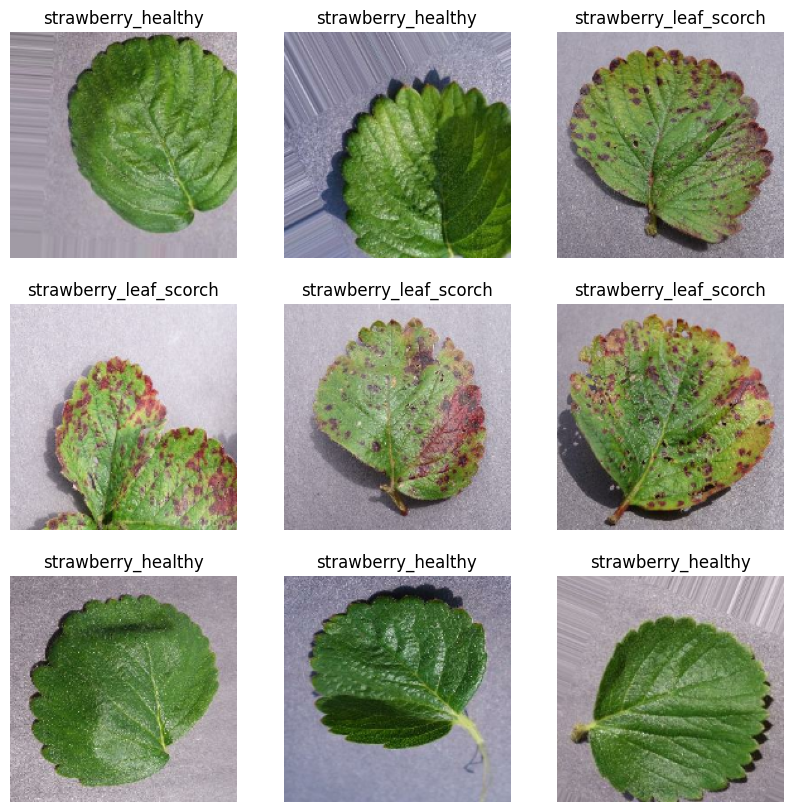


Image Statistics:
Mean pixel value: 128.47
Std pixel value: 51.96


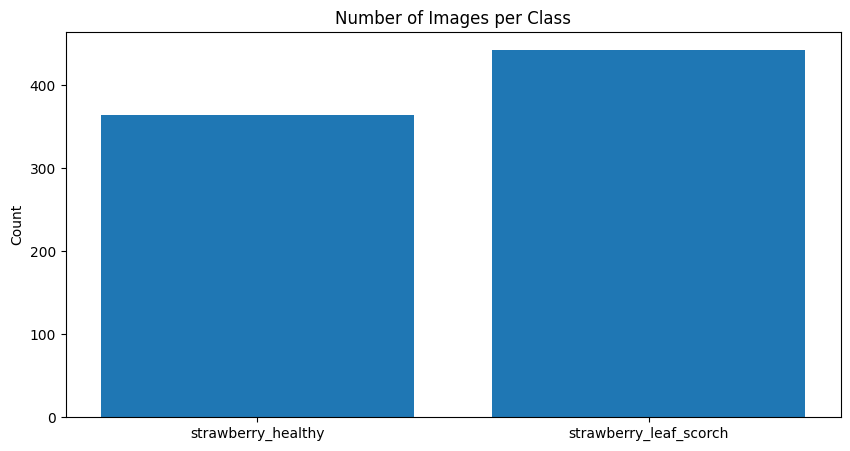

2024-12-07 11:29:21.224493: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [806]
	 [[{{node Placeholder/_4}}]]
2024-12-07 11:29:21.224869: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [806]
	 [[{{node Placeholder/_4}}]]



Image batch shape: (32, 180, 180, 3)
Labels batch shape: (32,)


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# base info
print("Dataset Info:")
print(f"Train dataset size - Number of batches: {len(train_dataset)}")
print(f"Validation dataset size - Number of batches: {len(validation_dataset)}")
print(f"Test dataset size- Number of batches: {len(test_dataset)}")

# class names
class_names = train_dataset.class_names
print("\nClass names:", class_names)

# image counts
def count_images_per_class(dataset):
    counts = {name: 0 for name in class_names}
    for images, labels in dataset:
        for label in labels:
            counts[class_names[label.numpy()]] += 1
    return counts

train_counts = count_images_per_class(train_dataset)
print("\nImages per class in training set:", train_counts)

# check some images
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

# image statistics
def analyze_image_statistics(dataset):
    pixel_mean = []
    pixel_std = []
    for images, _ in dataset:
        pixel_mean.append(tf.reduce_mean(images))
        pixel_std.append(tf.math.reduce_std(images))
    
    return {
        'mean': tf.reduce_mean(pixel_mean),
        'std': tf.reduce_mean(pixel_std)
    }

stats = analyze_image_statistics(train_dataset)
print("\nImage Statistics:")
print(f"Mean pixel value: {stats['mean']:.2f}")
print(f"Std pixel value: {stats['std']:.2f}")

# show images
plt.figure(figsize=(10, 5))
plt.bar(class_names, list(train_counts.values()))
plt.title('Number of Images per Class')
plt.ylabel('Count')
plt.show()

# check batch shape
for image_batch, labels_batch in train_dataset.take(1):
    print("\nImage batch shape:", image_batch.shape)
    print("Labels batch shape:", labels_batch.shape)

## 3.Train two networks

### 3.1 Define a Neural Network 

In [16]:
from tensorflow.keras import layers, models

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)



In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

run about 25 minutes

In [18]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)              

Epoch 1/30
26/26 [==============================] - ETA: 0s - loss: 0.7557 - accuracy: 0.5881

2024-12-07 11:32:08.196779: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [403]
	 [[{{node Placeholder/_4}}]]
2024-12-07 11:32:08.197794: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [403]
	 [[{{node Placeholder/_4}}]]


26/26 [==============================] - 64s 2s/step - loss: 0.7557 - accuracy: 0.5881 - val_loss: 0.6418 - val_accuracy: 0.6303
Epoch 2/30
26/26 [==============================] - 67s 3s/step - loss: 0.5073 - accuracy: 0.8201 - val_loss: 0.8353 - val_accuracy: 0.6104
Epoch 3/30
26/26 [==============================] - 55s 2s/step - loss: 0.2409 - accuracy: 0.9181 - val_loss: 1.5538 - val_accuracy: 0.6253
Epoch 4/30
26/26 [==============================] - 39s 2s/step - loss: 0.2415 - accuracy: 0.9293 - val_loss: 0.0856 - val_accuracy: 0.9677
Epoch 5/30
26/26 [==============================] - 40s 2s/step - loss: 0.2160 - accuracy: 0.9653 - val_loss: 0.0532 - val_accuracy: 0.9702
Epoch 6/30
26/26 [==============================] - 37s 1s/step - loss: 0.1989 - accuracy: 0.9404 - val_loss: 0.0766 - val_accuracy: 0.9702
Epoch 7/30
26/26 [==============================] - 41s 2s/step - loss: 0.2000 - accuracy: 0.9541 - val_loss: 0.0400 - val_accuracy: 0.9777
Epoch 8/30
26/26 [=============

**Displaying curves of loss and accuracy during training**

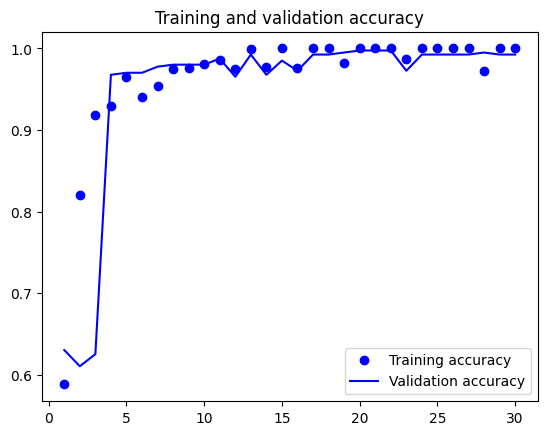

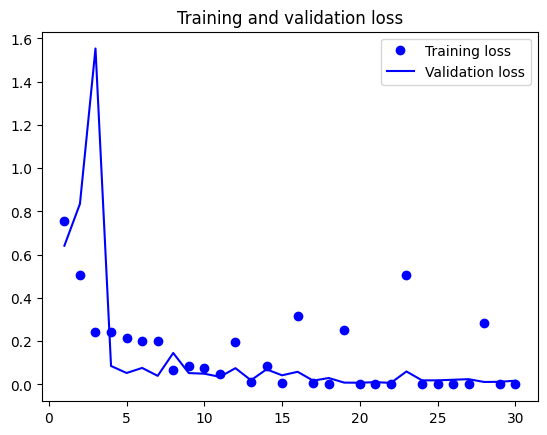

In [22]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [23]:
test_model = keras.models.load_model("./models/convnet_from_scratch_1123.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

OSError: No file or directory found at ./models/convnet_from_scratch_1123.keras

### 3.2 Fine-Tune VGG16 (pre-trained on imagenet)